# Generacion de Corpus - EDA

In [66]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud

In [68]:
# Funciones de limpieza:

def limpiar_texto(columna):
    # Hacer una copia para no modificar la original
    resultado = columna.copy()
    
    # Aplicar las transformaciones a toda la columna
    # Eliminar contenido entre paréntesis
    resultado = resultado.str.replace(r'\([^)]*\)', '', regex=True)
    # Eliminar /a y /o
    resultado = resultado.str.replace(r'\s*/[ao]\b', '', regex=True)
    # Hacer trim
    resultado = resultado.str.strip()
    
    return resultado

In [70]:
ruta_corpus01 = "../../data/raw/01 Corpus_Diccionario.xlsx"
ruta_corpus02 = "../../data/raw/02 Corpus_Paco_Yunque_esp_quechuachanca.xlsx"
ruta_corpus03 = "../../data/raw/03 Corpus Semiologia.xlsx"
ruta_corpus04 = "../../data/raw/04 Corpus El_vencedor_español_quechua_chanka.xlsx"
ruta_corpus05 = "../../data/raw/05 CORPUS manualparaelempleodelquechuachankaenlaadministraciondejusticia.xlsx"

# Leer el archivo indicando que no use la primera fila como encabezado
df_corpus01 = pd.read_excel(ruta_corpus01, header=None)
df_corpus02 = pd.read_excel(ruta_corpus02, header=None)
df_corpus03 = pd.read_excel(ruta_corpus03, header=None)
df_corpus04 = pd.read_excel(ruta_corpus04, sheet_name='Chanka', header=None)
df_corpus05 = pd.read_excel(ruta_corpus05, header=None)

#Archivos de salida:
archivo_salida = '../../data/raw/corpus_total_formateado_esp_quec.txt'

# Mostrar las primeras filas
print(df_corpus01.head())
print(df_corpus02.head())
print(df_corpus03.head())
print(df_corpus04.head())
print(df_corpus05.head())


                                                   0
0              ¡Ama chiptiwaychu!.¡No me pellizques!
1           ¡Ama sarata saruychu!.¡No pises el maíz!
2     ¡Ama wawata qaqchaychu!.¡No reprendas al niño!
3  ¡Killapa wawan hatun chirapa wiqillaykita qapi...
4  ¿Chillpi rinri wakayta manachu rikurqanki?.¿No...
                                                   0  \
0  Cuando Paco Yunque y su madre llegaron a la pu...   
1             los niños estaban jugando en el patio.   
2                         La madre le dejó y se fue.   
3                             Paco estaba con miedo    
4  porque era la primera vez que venía a un coleg...   

                                                   1  
0  Paco Yunque mamanpiwan yachaywasiman chayarupt...  
1               warmakunaqa pampapi pukllachkasqaku.  
2                           Maman saqiruspa pasakun.  
3                        Pacoqa manchakuywan karqan   
4  wamaqllaraq yachaywasita qawaspa; hinaspa achk...  
               

In [72]:
df_corpus01 = pd.read_excel(ruta_corpus01, header=None)
df_corpus01 = df_corpus01[0].str.partition('.')

# partition crea 3 columnas: [antes del punto, el punto, después del punto]
# si solo quieres 2 columnas (incluyendo el punto en la primera)
df_corpus01 = df_corpus01[[0, 2]]  # columna 0 (texto + punto) y columna 2 (lo que sigue)
df_corpus01.columns = ['Quechua', 'Espaniol']  # renombrar columnas
df_corpus01 = df_corpus01[['Espaniol','Quechua']]
print(df_corpus01.head())


                                            Espaniol  \
0                                 ¡No me pellizques!   
1                                 ¡No pises el maíz!   
2                             ¡No reprendas al niño!   
3  ¡Arco iris hijo de la luna exprime tus lágrima...   
4  ¿No has visto a mi vaca que tiene las orejas f...   

                                             Quechua  
0                                 ¡Ama chiptiwaychu!  
1                              ¡Ama sarata saruychu!  
2                            ¡Ama wawata qaqchaychu!  
3  ¡Killapa wawan hatun chirapa wiqillaykita qapi...  
4         ¿Chillpi rinri wakayta manachu rikurqanki?  


In [74]:
df_corpus02.columns = ['Espaniol','Quechua']
print(df_corpus02.head())

                                            Espaniol  \
0  Cuando Paco Yunque y su madre llegaron a la pu...   
1             los niños estaban jugando en el patio.   
2                         La madre le dejó y se fue.   
3                             Paco estaba con miedo    
4  porque era la primera vez que venía a un coleg...   

                                             Quechua  
0  Paco Yunque mamanpiwan yachaywasiman chayarupt...  
1               warmakunaqa pampapi pukllachkasqaku.  
2                           Maman saqiruspa pasakun.  
3                        Pacoqa manchakuywan karqan   
4  wamaqllaraq yachaywasita qawaspa; hinaspa achk...  


In [76]:
df_corpus03.columns = ['Espaniol','Quechua']
print(df_corpus03.head())

                                           Espaniol  \
0  Buenas noches, señor / señora / joven / señorita   
1                                      ¿Cómo estás?   
2                                  ¿Cómo te llamas?   
3                             ¿Cuántos años tienes?   
4                                   ¿De dónde eres?   

                                    Quechua  
0  Allin tuta taytay / mama / wayna / sipas  
1                         ¿Imayna kashanky?  
2                            ¿Iman sutiyki?  
3                   ¿Hayq'a huatayoc kanki?  
4                          ¿Maymanta kanki?  


In [78]:
df_corpus04.columns = ['Espaniol','Quechua']
print(df_corpus04.head())

                                            Espaniol  \
0         ¡Uyuyuy! ¡Ya va a llorar! ¡Ya va a llorar!   
1                                ¡Déjenlo! ¡Déjenlo!   
2        Volaron palmas. Crujió un despecho en alto.   
3  Cancio se enardecía visiblemente y cobró la of...   
4                        ¡El profesor! ¡El profesor!   

                                             Quechua  
0                 ¡Ayayay! ¡Waqarunqam! ¡Waqarunqam!  
1                        ¡Hina kachun! ¡Hina kachun!  
2      Taqllakuykunkum. Ancha piñakuymi uyarirqukun.  
3  Qawachkaptillayku Cancio piñarparikun hinaspa ...  
4                            ¡Yachachiq! ¡Yachachiq!  


In [80]:
df_corpus05.columns = ['Espaniol','Quechua']

# Aplicar a ambas columnas
df_corpus05['Espaniol'] = limpiar_texto(df_corpus05['Espaniol'])
df_corpus05['Quechua'] = limpiar_texto(df_corpus05['Quechua'])

print(df_corpus05.head(20))

                 Espaniol                                Quechua
0     ¿Está bien, señora?                  ¿Allinllanchu, mamáy?
1     ¡Estoy bien, señor!                  ¡Allinllanmi, taytáy!
2      Señor, ¿cómo está?                  Taytáy, ¿allillanchu?
3      Señora, estoy bien                      Mamáy, allillanmi
4      ¿Cómo está, señor?         ¿Imaynallam kachkanki, taytáy?
5            Bien, doctor                      Allinllam, doctor
6     ¿Cómo está, señora?         ¿Imaynallam kachkanki, taytáy?
7            Bien, doctor                      Allinllam, doctor
8   ¿Cómo están, señoras?  ¿Imaynallam kachkankichik, mamaykuna?
9              Bien, jefe                        Allinllam, jefe
10    Buenos días, doctor                     Ñuqallaymi, doctor
11    Buenos días, doctor                    Ñuqallaykum, doctor
12   Buenos días, doctora                 Hamullachkani, doctora
13   Buenos días, doctora               Hamullachkaniku, doctora
14       Le recibo, señor

## Unir los DF...

In [83]:
#Agregamos una columna para ver la fuente:

df_corpus01['origen'] = 'df1'
df_corpus02['origen'] = 'df2'
df_corpus03['origen'] = 'df3'
df_corpus04['origen'] = 'df4'
df_corpus05['origen'] = 'df5'

df_unido = pd.concat([df_corpus01, df_corpus02, df_corpus03, df_corpus04, df_corpus05], ignore_index=True)
print(df_unido.head())

                                            Espaniol  \
0                                 ¡No me pellizques!   
1                                 ¡No pises el maíz!   
2                             ¡No reprendas al niño!   
3  ¡Arco iris hijo de la luna exprime tus lágrima...   
4  ¿No has visto a mi vaca que tiene las orejas f...   

                                             Quechua origen  
0                                 ¡Ama chiptiwaychu!    df1  
1                              ¡Ama sarata saruychu!    df1  
2                            ¡Ama wawata qaqchaychu!    df1  
3  ¡Killapa wawan hatun chirapa wiqillaykita qapi...    df1  
4         ¿Chillpi rinri wakayta manachu rikurqanki?    df1  


## Generar el archivo de Salida para el Entrenamiento

In [86]:
with open(archivo_salida, 'w', encoding='utf-8') as f_out:
    for idx, fila in df_unido.iterrows():
        # Obtener los textos de cada columna
        texto_esp = str(fila['Espaniol']).strip()
        texto_que = str(fila['Quechua']).strip()
        
        # Generar IDs únicos (puedes ajustar según necesites)
        id_esp = f"{idx:06d}"  # ID basado en el índice
        id_que = f"{idx:06d}"  # ID diferente para quechua
        
        # Escribir con tabuladores
        f_out.write(f"{id_esp}\t{texto_esp}\t{id_que}\t{texto_que}\n")

## EDA

In [29]:
#Número total de pares de oraciones
total_pares = len(df_unido)
print(f"\n1. Número total de pares de oraciones en el corpus: {total_pares}")


1. Número total de pares de oraciones en el corpus: 2023


In [31]:
# 2. Longitud de oraciones (en número de palabras)
df_unido['es_len'] = df_unido['Espaniol'].apply(lambda x: len(x.split()))
df_unido['qu_len'] = df_unido['Quechua'].apply(lambda x: len(x.split()))

print("\n2. Estadísticas de longitud de oraciones (en palabras):")
print("   Español:")
print(df_unido['es_len'].describe())
print(f"   Percentil 95 (Español): {np.percentile(df_unido['es_len'], 95):.0f} palabras")
print("\n   Quechua:")
print(df_unido['qu_len'].describe())
print(f"   Percentil 95 (Quechua): {np.percentile(df_unido['es_len'], 95):.0f} palabras")


2. Estadísticas de longitud de oraciones (en palabras):
   Español:
count    2023.000000
mean        6.245675
std         4.579277
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        38.000000
Name: es_len, dtype: float64
   Percentil 95 (Español): 15 palabras

   Quechua:
count    2023.000000
mean        3.622343
std         2.467341
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        22.000000
Name: qu_len, dtype: float64
   Percentil 95 (Quechua): 15 palabras


In [33]:
# 4. Palabras más comunes (excluyendo stopwords)
stop_words_es = set(stopwords.words('spanish'))
    
# Para Quechua, NLTK no tiene stopwords predefinidas.
# Si tienes una lista de stopwords en Quechua, puedes cargarla aquí:
# Por ejemplo: stop_words_qu = set(['kay', 'icha', 'ñuqanchik', ...])
# Para este ejemplo, no filtraremos stopwords específicas para Quechua si no tienes una lista.
    
all_words_es = ' '.join(df_unido['Espaniol']).lower()
# Filtra palabras que no son alfabéticas (números, puntuación) y stopwords de español
words_es = [word for word in nltk.word_tokenize(all_words_es) if word.isalpha() and word not in stop_words_es]
freq_dist_es = nltk.FreqDist(words_es)
    
all_words_qu = ' '.join(df_unido['Quechua']).lower()
# Para Quechua, solo filtra palabras que no son alfabéticas
words_qu = [word for word in nltk.word_tokenize(all_words_qu) if word.isalpha()]
freq_dist_qu = nltk.FreqDist(words_qu)

print("\n4. Las 10 palabras más comunes (excluyendo stopwords en español):")
print("   Español:", freq_dist_es.most_common(10))
print("   Quechua:", freq_dist_qu.most_common(10)) # Puede que veas palabras comunes si no hay stopwords específicas


4. Las 10 palabras más comunes (excluyendo stopwords en español):
   Español: [('paco', 97), ('profesor', 82), ('grieve', 76), ('yunque', 74), ('humberto', 66), ('usted', 65), ('señor', 58), ('dijo', 56), ('fariña', 44), ('bien', 43)]
   Quechua: [('manam', 119), ('paco', 77), ('mana', 76), ('nin', 61), ('humberto', 58), ('hinaspa', 57), ('yachachiq', 54), ('hina', 47), ('o', 43), ('chay', 38)]


C:\Users\ferhe\AppData\Local\Temp\ipykernel_44916\241881786.py:21: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout() # Ajusta el diseño para que no se superpongan los títulos/etiquetas
C:\Users\ferhe\AppData\Local\Temp\ipykernel_44916\241881786.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout() # Ajusta el diseño para que no se superpongan los títulos/etiquetas
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


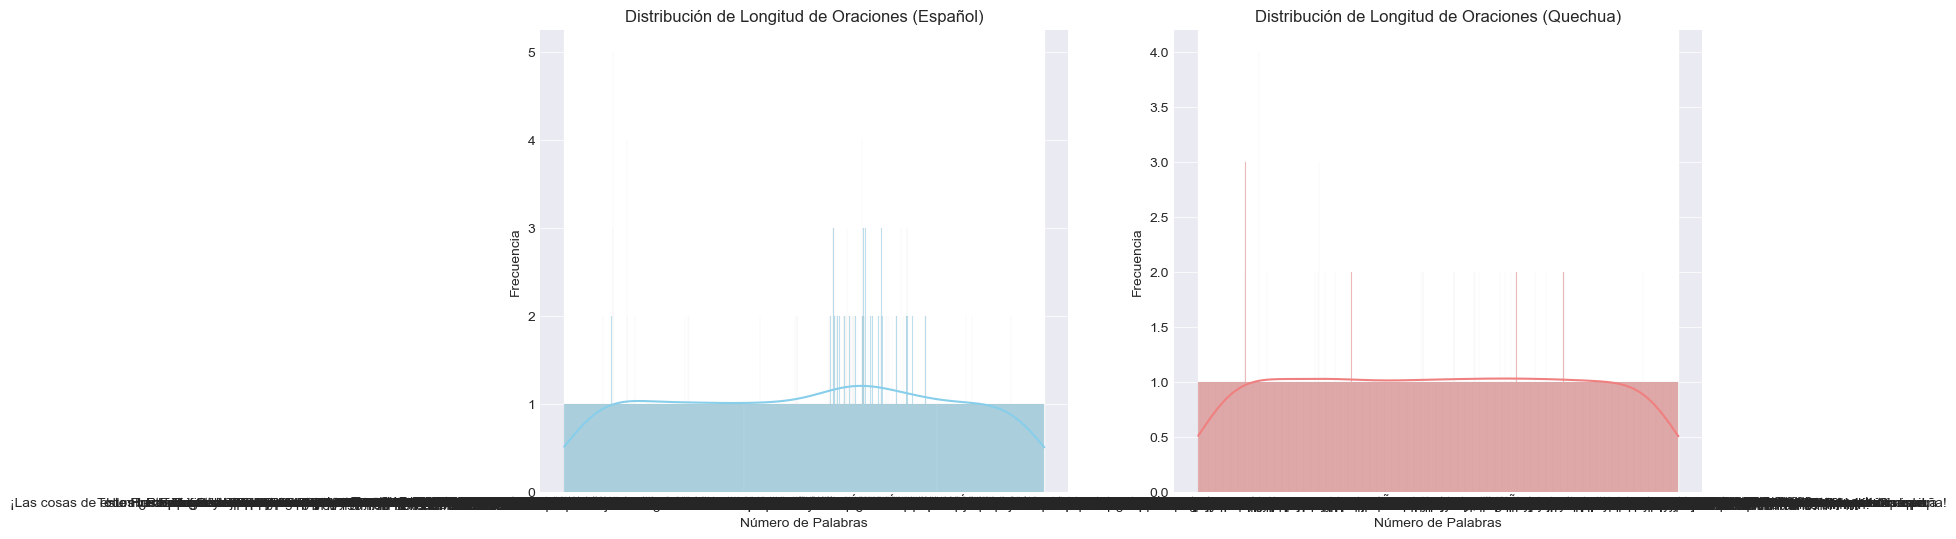

In [35]:
# Configuración de los gráficos
plt.style.use('seaborn-v0_8-darkgrid') # Estilo más moderno para los gráficos
plt.figure(figsize=(15, 6))

# Histograma de Longitud de Oraciones (Español)
plt.subplot(1, 2, 1) # 1 fila, 2 columnas, primer gráfico
sns.histplot(df_unido['Espaniol'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Longitud de Oraciones (Español)')
plt.xlabel('Número de Palabras')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)

# Histograma de Longitud de Oraciones (Quechua)
plt.subplot(1, 2, 2) # 1 fila, 2 columnas, segundo gráfico
sns.histplot(df_unido['Quechua'], bins=30, kde=True, color='lightcoral')
plt.title('Distribución de Longitud de Oraciones (Quechua)')
plt.xlabel('Número de Palabras')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout() # Ajusta el diseño para que no se superpongan los títulos/etiquetas
plt.show()

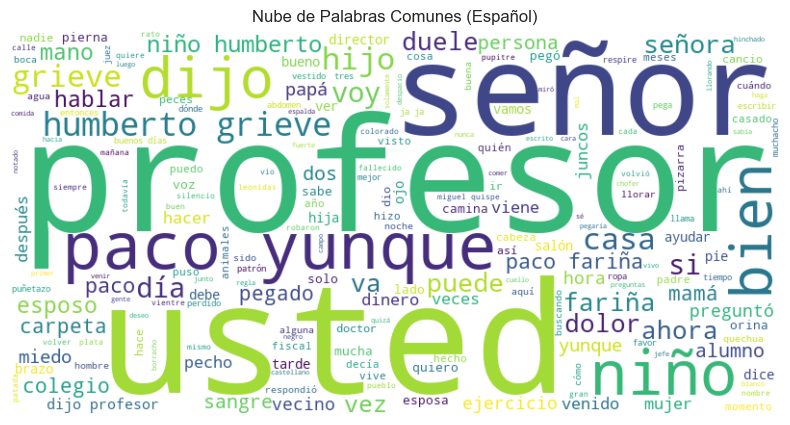

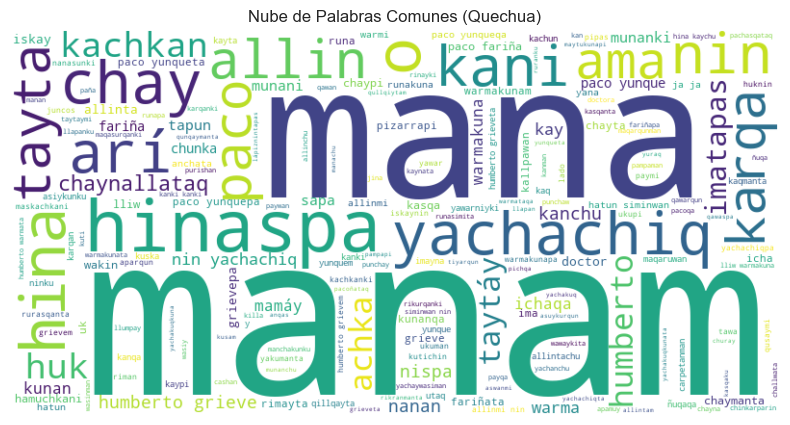

In [39]:
# Nubes de Palabras
# Une todas las palabras limpias para generar la nube
# Asegúrate de que las cadenas de texto no estén vacías
text_es = ' '.join(words_es)
text_qu = ' '.join(words_qu)

if text_es:
    wordcloud_es = WordCloud(width=800, height=400, background_color='white').generate(text_es)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_es, interpolation='bilinear')
    plt.axis('off') # Ocultar ejes
    plt.title('Nube de Palabras Comunes (Español)')
    plt.show()
else:
    print("No hay suficientes palabras en español para generar la nube de palabras.")

if text_qu:
    wordcloud_qu = WordCloud(width=800, height=400, background_color='white').generate(text_qu)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_qu, interpolation='bilinear')
    plt.axis('off') # Ocultar ejes
    plt.title('Nube de Palabras Comunes (Quechua)')
    plt.show()
else:
    print("No hay suficientes palabras en quechua para generar la nube de palabras.")

In [41]:
#Evalúa nulos, tipos, duplicados, outliers y consistencia.
print("=== CALIDAD DE LOS DATOS ===\n")

# Nulos
print("Valores nulos por columna:")
print(df_unido.isnull().sum())

# Tipos de datos
print("\nTipos de datos:")
print(df_unido.dtypes)

# Duplicados
duplicados = df_unido.duplicated(subset=['Espaniol', 'Quechua']).sum()
print(f"\nDuplicados exactos de pares (Español-Quechua): {duplicados}")

# Outliers en longitud de oraciones
q1_es, q3_es = np.percentile(df_unido['es_len'], [25, 75])
iqr_es = q3_es - q1_es
limite_sup_es = q3_es + 1.5 * iqr_es

q1_qu, q3_qu = np.percentile(df_unido['qu_len'], [25, 75])
iqr_qu = q3_qu - q1_qu
limite_sup_qu = q3_qu + 1.5 * iqr_qu

outliers_es = (df_unido['es_len'] > limite_sup_es).sum()
outliers_qu = (df_unido['qu_len'] > limite_sup_qu).sum()

print(f"\nOutliers de longitud (Español): {outliers_es}")
print(f"Outliers de longitud (Quechua): {outliers_qu}")


=== CALIDAD DE LOS DATOS ===

Valores nulos por columna:
Espaniol    0
Quechua     0
origen      0
es_len      0
qu_len      0
dtype: int64

Tipos de datos:
Espaniol    object
Quechua     object
origen      object
es_len       int64
qu_len       int64
dtype: object

Duplicados exactos de pares (Español-Quechua): 21

Outliers de longitud (Español): 138
Outliers de longitud (Quechua): 149



=== DISTRIBUCIONES Y RELACIONES ===



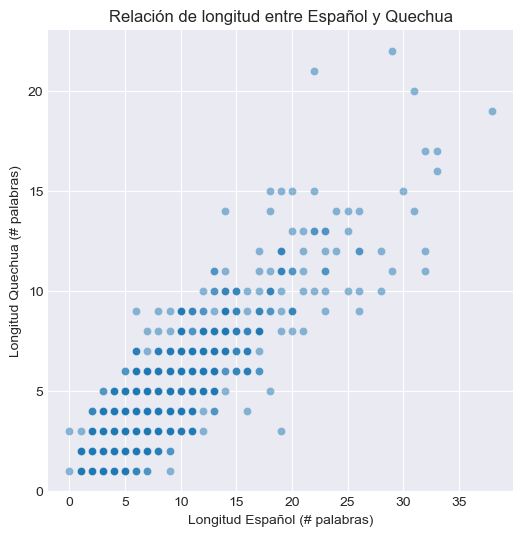

Correlación entre longitudes de oraciones:
          es_len    qu_len
es_len  1.000000  0.874194
qu_len  0.874194  1.000000


C:\Users\ferhe\AppData\Local\Temp\ipykernel_44916\1399653695.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='origen', data=df_unido, palette='pastel')


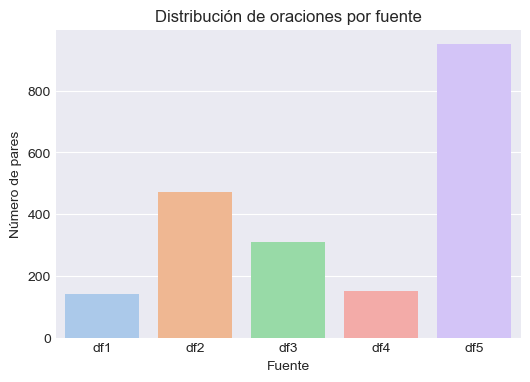

In [43]:
print("\n=== DISTRIBUCIONES Y RELACIONES ===\n")

# Relación entre longitudes (Español vs Quechua)
plt.figure(figsize=(6, 6))
sns.scatterplot(x='es_len', y='qu_len', data=df_unido, alpha=0.5)
plt.title('Relación de longitud entre Español y Quechua')
plt.xlabel('Longitud Español (# palabras)')
plt.ylabel('Longitud Quechua (# palabras)')
plt.show()

# Correlación numérica
corr = df_unido[['es_len', 'qu_len']].corr()
print("Correlación entre longitudes de oraciones:")
print(corr)

# Balance entre fuentes
plt.figure(figsize=(6, 4))
sns.countplot(x='origen', data=df_unido, palette='pastel')
plt.title('Distribución de oraciones por fuente')
plt.xlabel('Fuente')
plt.ylabel('Número de pares')
plt.show()


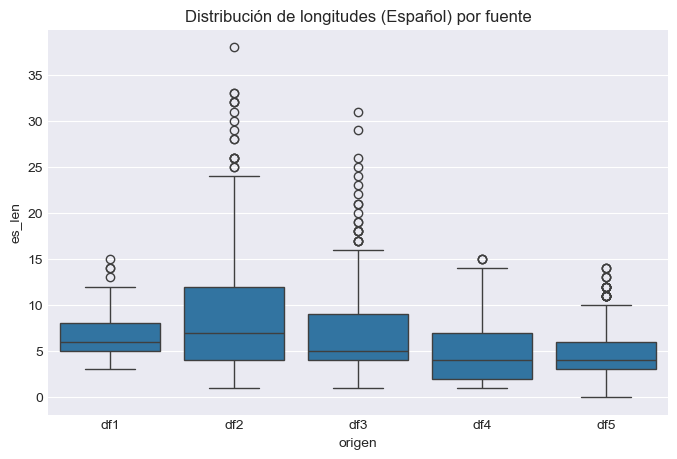


Porcentaje de oraciones por fuente:
origen
df5    46.959960
df2    23.282254
df3    15.323777
df4     7.414731
df1     7.019278
Name: proportion, dtype: float64


In [45]:
# Desbalance: Distribución de longitud por corpus
plt.figure(figsize=(8, 5))
sns.boxplot(x='origen', y='es_len', data=df_unido)
plt.title('Distribución de longitudes (Español) por fuente')
plt.show()

# Porcentaje de oraciones por fuente
porcentaje_fuente = df_unido['origen'].value_counts(normalize=True) * 100
print("\nPorcentaje de oraciones por fuente:")
print(porcentaje_fuente)


In [47]:
# Leakage: Buscar frases repetidas en español o quechua
duplicados_es = df_unido['Espaniol'].duplicated().sum()
duplicados_qu = df_unido['Quechua'].duplicated().sum()

print(f"\nDuplicados solo en Español: {duplicados_es}")
print(f"Duplicados solo en Quechua: {duplicados_qu}")



Duplicados solo en Español: 104
Duplicados solo en Quechua: 36


In [49]:
# Filtrar las oraciones duplicadas en español
duplicados_es_df = df_unido[df_unido.duplicated(subset=['Espaniol'], keep=False)]

# Ordenar para verlas agrupadas
duplicados_es_df = duplicados_es_df.sort_values(by='Espaniol')

print(f"Número de duplicados en Español: {duplicados_es_df.shape[0]}")
print(duplicados_es_df.head(10))  # Muestra los primeros 10 duplicados


Número de duplicados en Español: 188
                        Espaniol                       Quechua origen  es_len  \
1519                              Morguemanmi wañuqta apasaqku    df5       0   
1183                                            Dispinsaykuway    df5       0   
1482  Atropellaron a un hijo mío            Wawayta sarurparin    df5       5   
1481  Atropellaron a un hijo mío           Churiyta sarurparin    df5       5   
1078                Bien, doctor             Allinllam, doctor    df5       2   
1080                Bien, doctor             Allinllam, doctor    df5       2   
530      Bueno dijo el profesor.        Allinmi nin yachachiq.    df2       4   
509      Bueno dijo el profesor.        Allinmi nin yachachiq.    df2       4   
1084         Buenos días, doctor           Ñuqallaykum, doctor    df5       3   
1083         Buenos días, doctor            Ñuqallaymi, doctor    df5       3   

      qu_len  
1519       3  
1183       1  
1482       2  
1481       

In [51]:
# Filtrar las oraciones duplicadas en quechua
duplicados_qu_df = df_unido[df_unido.duplicated(subset=['Quechua'], keep=False)]
duplicados_qu_df = duplicados_qu_df.sort_values(by='Quechua')

print(f"Número de duplicados en Quechua: {duplicados_qu_df.shape[0]}")
print(duplicados_qu_df.head(10))


Número de duplicados en Quechua: 67
                        Espaniol                 Quechua origen  es_len  \
1078                Bien, doctor       Allinllam, doctor    df5       2   
1080                Bien, doctor       Allinllam, doctor    df5       2   
547   Muy bien dijo el profesor.  Allinmi nin yachachiq.    df2       5   
530      Bueno dijo el profesor.  Allinmi nin yachachiq.    df2       4   
509      Bueno dijo el profesor.  Allinmi nin yachachiq.    df2       4   
602                    Muy bien.                Allinmi.    df2       2   
536                    Muy bien.                Allinmi.    df2       2   
1164              No se preocupe         Ama llakikuychu    df5       3   
2004              No se preocupe         Ama llakikuychu    df5       3   
503                    Sí señor.              Arí tayta.    df2       2   

      qu_len  
1078       2  
1080       2  
547        3  
530        3  
509        3  
602        1  
536        1  
1164       2  
200

In [53]:
# Pares idénticos
duplicados_pares = df_unido[df_unido.duplicated(subset=['Espaniol', 'Quechua'], keep=False)]
duplicados_pares = duplicados_pares.sort_values(by=['Espaniol', 'Quechua'])

print(f"Pares idénticos duplicados: {duplicados_pares.shape[0]}")
print(duplicados_pares.head(10))


Pares idénticos duplicados: 38
                     Espaniol                 Quechua origen  es_len  qu_len
1078             Bien, doctor       Allinllam, doctor    df5       2       2
1080             Bien, doctor       Allinllam, doctor    df5       2       2
509   Bueno dijo el profesor.  Allinmi nin yachachiq.    df2       4       3
530   Bueno dijo el profesor.  Allinmi nin yachachiq.    df2       4       3
1536      Con un palo me pegó      Kaspiwan maqaruwan    df5       5       2
1572      Con un palo me pegó      Kaspiwan maqaruwan    df5       5       2
1340             En la fiesta                Raymipim    df5       3       1
1987             En la fiesta                Raymipim    df5       3       1
283     Humberto Grieve dijo:    Humberto Grieve nin:    df2       3       3
298     Humberto Grieve dijo:    Humberto Grieve nin:    df2       3       3


In [55]:
# Drift: Media y desviación por fuente
stats_por_fuente = df_unido.groupby('origen')[['es_len', 'qu_len']].agg(['mean', 'std'])
print("\nEstadísticas de longitud por fuente:")
print(stats_por_fuente)



Estadísticas de longitud por fuente:
          es_len              qu_len          
            mean       std      mean       std
origen                                        
df1     6.690141  2.441320  3.669014  1.134387
df2     9.125265  6.587482  5.254777  3.564430
df3     7.170968  5.013877  4.074194  2.481839
df4     5.220000  3.555636  3.200000  1.969567
df5     4.611579  2.206340  2.725263  1.284295


## 4. Conclusiones accionables

### 🔹 Escalabilidad
Mantener el entorno *offline* posibilita el crecimiento modular: se pueden agregar nuevos corpus especializados (por dominio o dialecto quechua) y reentrenar los modelos sin depender de servicios externos.  
Esto garantiza independencia tecnológica y fomenta el desarrollo sostenible del proyecto en el tiempo.

### 🔹 Extensión futura
Añadir modo **bidireccional (Quechua → Español)** con el mismo *pipeline* pero modelo invertido, para agregar funcionalidad al módulo.

### 🔹 Modo offline
El hecho de conservar todos los componentes del sistema —modelo **BART fine-tuned**, modelo de *embeddings* **SentenceTransformer** y corpus de referencia— en almacenamiento local representa una decisión técnica estratégica de autonomía total del sistema (*offline*).  
Al operar completamente sin conexión, el traductor puede funcionar en entornos rurales o institucionales donde la conectividad a internet es limitada o inexistente.  
Esto es especialmente relevante en comunidades andinas, donde el acceso a redes puede ser irregular.  
La ejecución local garantiza disponibilidad continua del traductor en cualquier circunstancia.
ircunstancia.
ircunstancia.
